In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import plotly.graph_objects as go
import statsmodels.api as sm
import plotly.express as px

In [3]:
df = pd.read_csv('películas.csv') 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   show_id        22998 non-null  object
 1   type           22998 non-null  object
 2   title          22998 non-null  object
 3   director       22998 non-null  object
 4   cast           22998 non-null  object
 5   country        22998 non-null  object
 6   date_added     22998 non-null  object
 7   release_year   22998 non-null  int64 
 8   rating         22998 non-null  object
 9   duration       22998 non-null  object
 10  listed_in      22998 non-null  object
 11  description    22998 non-null  object
 12  id             22998 non-null  object
 13  platform       22998 non-null  object
 14  duration_int   22998 non-null  object
 15  duration_type  22998 non-null  object
dtypes: int64(1), object(15)
memory usage: 2.8+ MB


In [5]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,id,platform,duration_int,duration_type
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30 00:00:00,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,amazon,113,min
1,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30 00:00:00,2018,13+,110 min,"drama, international",a metro family decides to fight a cyber crimin...,as2,amazon,110,min


In [6]:
df = df.replace(['sin dato'],'0')


Se reemplazaron los ['sin dato'] por '0' para permitir despues transformar la columna a tipo INT o entero

In [7]:
df['duration_int'] = df['duration_int'].astype(int)


In [8]:
df['duration_int'].describe()


count    22998.000000
mean        65.710584
std         51.760868
min          0.000000
25%          3.000000
50%         83.000000
75%        101.000000
max        601.000000
Name: duration_int, dtype: float64

La mayoria de las peliculas o series TV tienen una duracion entre 80 y 100 minutos, la duracion promedio estaria en 65 minutos lo cual nos dice que este seria el tiempo comercial de una pelicula o show. Hay valores de minimo 0 y maximo 600 que podriamos considerarlos outliers

C:\Users\USER\AppData\Local\Temp\ipykernel_15300\2415776235.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration_int'], color='g', bins=100, hist_kws={'alpha': 0.4});


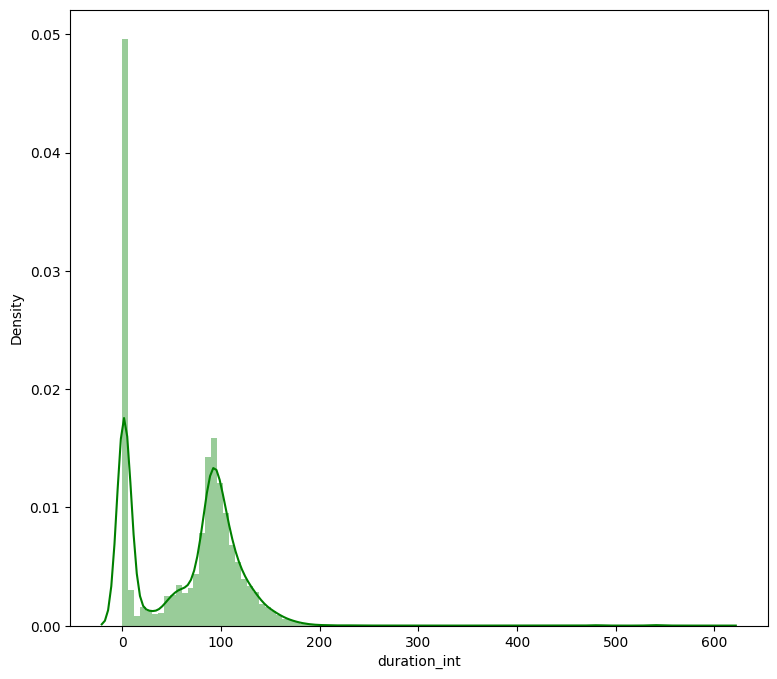

In [9]:
# duration_int Distribution
plt.figure(figsize=(9, 8))
sns.distplot(df['duration_int'], color='g', bins=100, hist_kws={'alpha': 0.4});
plt.savefig('duration_int.png')

Este valor de 0 habra que saberlo manejar porque hay que determinar si eliminando estos 0 pueden afectar las metricas que estamos analizando. Una duracion igual a 100 nos indica que un punto central al que apuntan las plataformas pudiendo ser el tiempo mas taquillero o de mayor probabilidad de que tenga exito comercial ya que es el mas utilizado

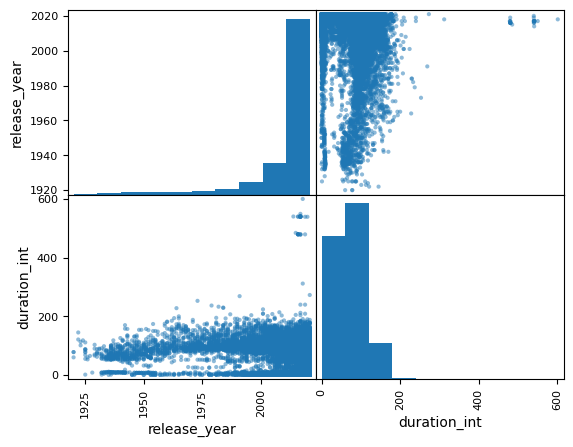

In [10]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

Se reafirma lo dixho anteriormente sobre la gran cantidad de datos con duracion 0 para saber que hacer con ellos antes de simplemente eliminarlos por si son de algun provecho comercial si ese valor es convertido en algun otro. 100 minutos como tiempo central de tendencia y con unps valores por encima de 400 que los podriamos considerar outliers o hacer una investigacion mas profunda

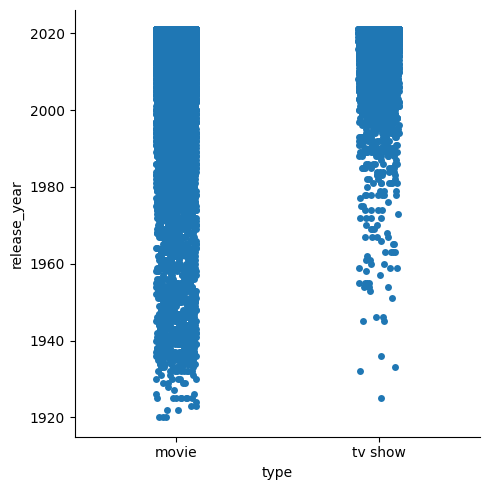

In [11]:
sns.catplot(data = df, x = 'type', y = 'release_year')

Los shows han venido ganando terreno y para los años cercanos se observa una paridad en cuanto ha cantidad producidos. El inversionista o director de cine
podra enfocar su accion comercial a cualquiera de los dos tipos ya estan igualados a la fecha

C:\Users\USER\AppData\Local\Temp\ipykernel_15300\3859881168.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr())


<AxesSubplot: >

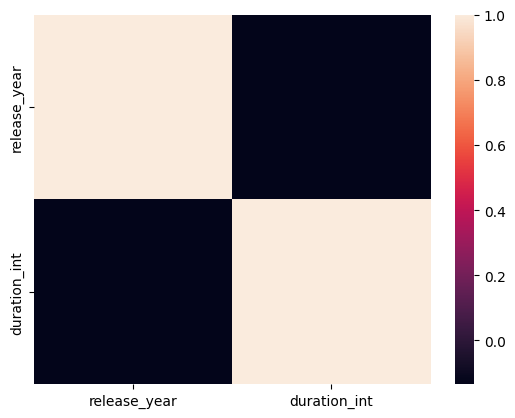

In [12]:
sns.heatmap(data=df.corr()) 


Se observa que no hay correlacion entre estas dos variables que son las unicas numericas con que cuenta el dataset.

In [13]:
df.groupby('platform').size()

platform
amazon     9668
disney     1450
hulu       3073
netflix    8807
dtype: int64

amazon y netflix lideran las plataformas que emiten peliculas, este dato podria inclinar la balanza hacia que proveedor de peliculas me gustaria ver o cual 
por su mayor difusion de pronto tenga mayores tirulos y mayor variedad para ver. El inversionista le podria interesar hacia cual plataforma dirigir su inversion cuando vaya a producir una peliculo o show

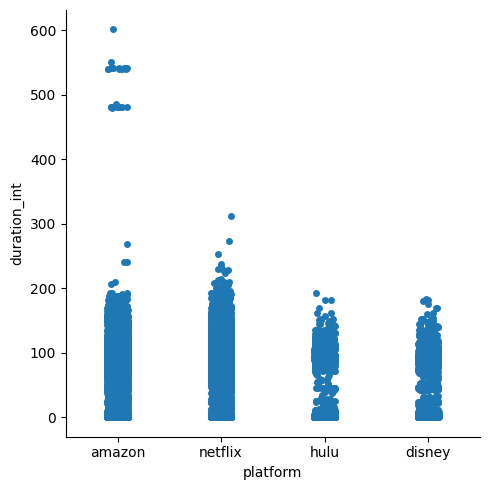

In [14]:
sns.catplot(data = df, x = 'platform', y = 'duration_int')

Todas las plataformas emiten por debajo de los 200 minutos de duracion de pelicula lo que permitiria custionar si algun director de cine quisiera salirse de estos tiempo de duracion en cada plataforma

In [15]:
types = df.groupby('type').size().reset_index().rename(columns = {0:'counts'})
types

,type,counts
0,movie,16481
1,tv show,6517


In [16]:
def figure_size():
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(10)
    font = {'family' : 'normal','size'   : 13}

<Figure size 1500x1000 with 0 Axes>

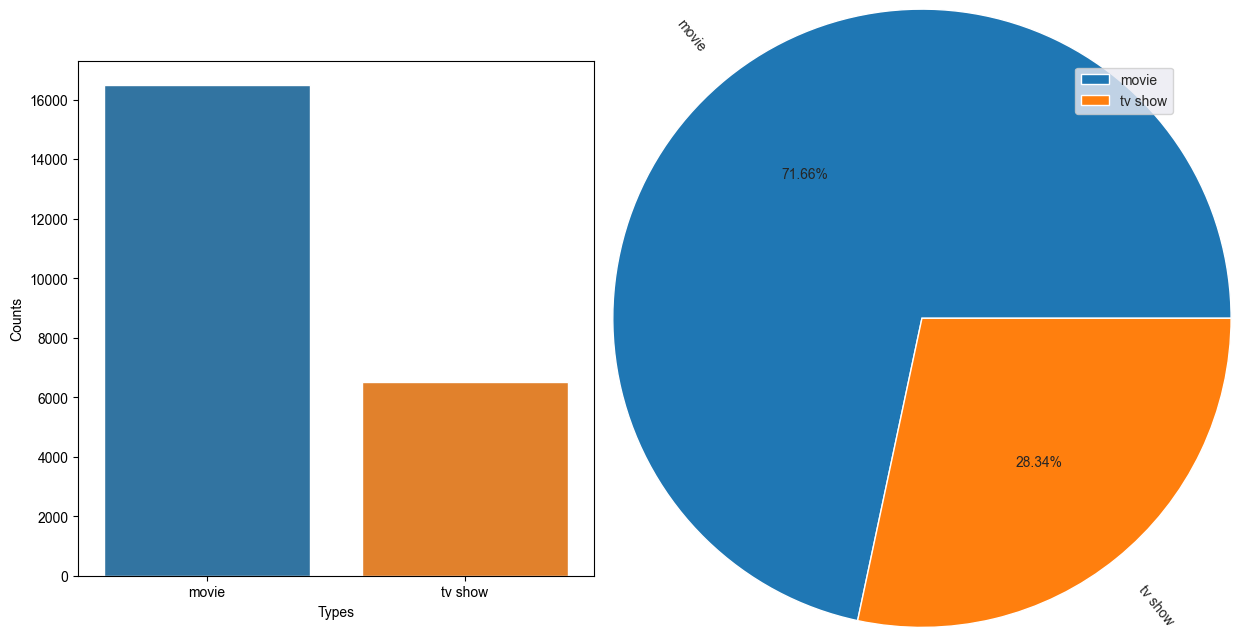

In [17]:
figure_size()
langs= types.type
fig, axes = plt.subplots(1,2, figsize=(12,6))
plt.tight_layout(pad=2)
sns.set_style("darkgrid")
a1=sns.barplot(x = types.type,y = types.counts,ax=axes[0]);
a1.set(xlabel='Types', ylabel='Counts')
plt.pie(types.counts,autopct='%1.2f%%',labels = langs,radius=1.5,labeldistance=1.1 ,   rotatelabels=True)
plt.legend()
plt.show()

Sabiendo que hay muchas mas peliculas que tv show el observador o inversionista podra optar por lo que mas le convenga
a sus intereses. La pelicula es mas conocida y mayor vista pero puede tener una mayor inversion que el show para que 
pueda ser visibilizada ybtener mediano exito. El TV show puede ser un campo menos explorado y con menor inversion

In [18]:
countries = df.groupby('country').size().reset_index().sort_values(by = 0,ascending = 0).reset_index().drop('index',axis = 1).rename(columns = {0:'counts'})
countries

,country,counts
0,0,11499
1,united states,4997
2,india,1203
3,united kingdom,583
4,japan,515
...,...,...
882,"ireland, united kingdom, italy, united states",1
883,"ireland, united kingdom, sweden, belgium, unit...",1
884,"ireland, united kingdom, united states, south ...",1
885,"ireland, united states, canada, united kingdom...",1


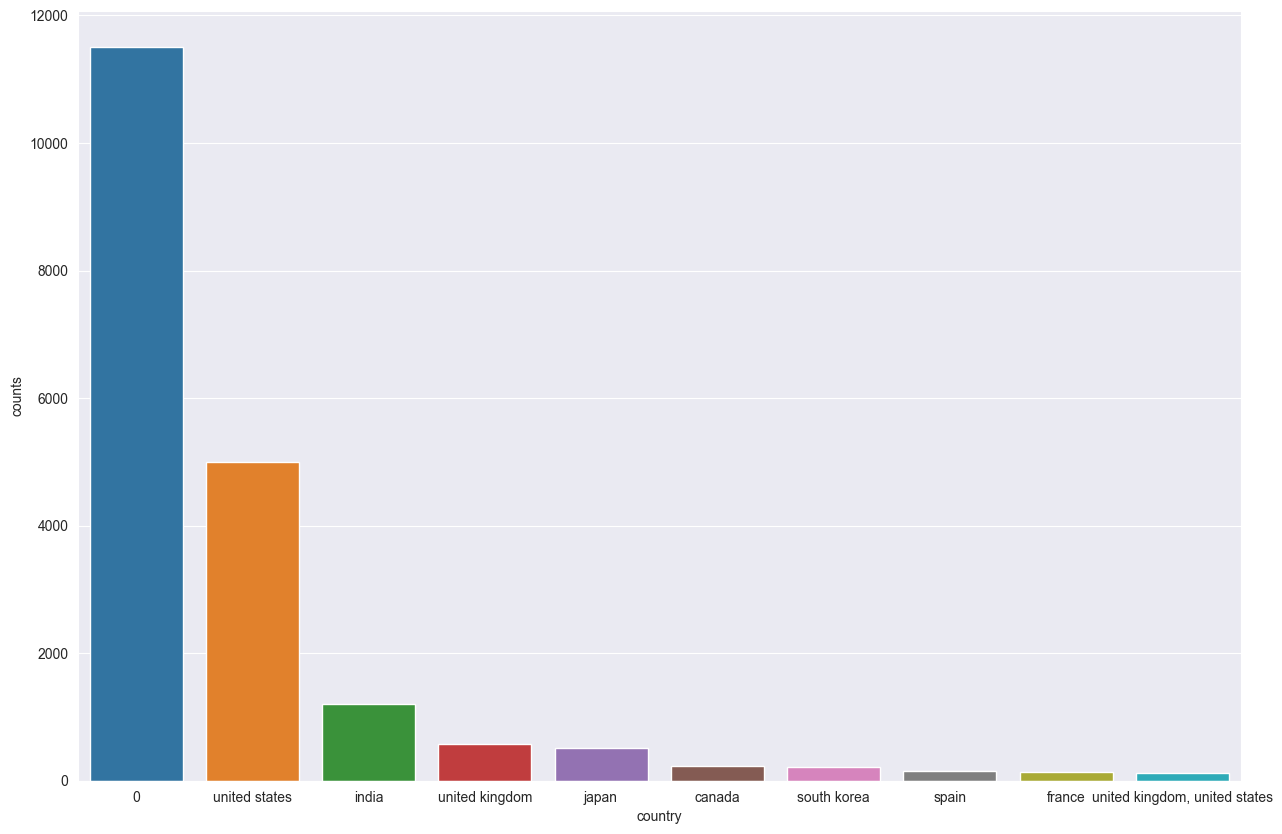

In [19]:
figure_size()
sns.barplot(x = countries.country[:10],y = countries.counts[:10]);
plt.show()

In [20]:
df.drop(df[(df['country'] ==0)].index, inplace=True)
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,id,platform,duration_int,duration_type
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30 00:00:00,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,amazon,113,min
1,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30 00:00:00,2018,13+,110 min,"drama, international",a metro family decides to fight a cyber crimin...,as2,amazon,110,min


<Figure size 1500x1000 with 0 Axes>

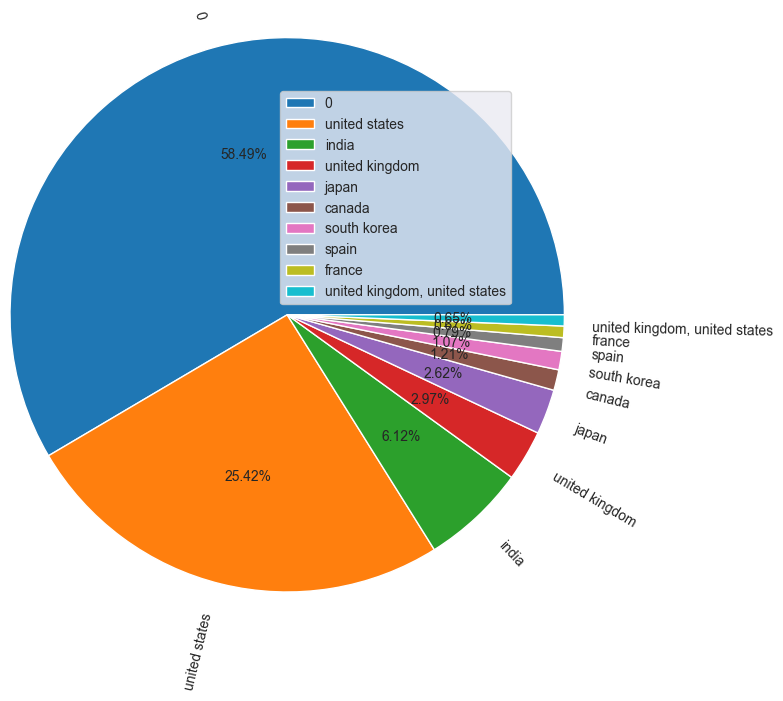

In [21]:
figure_size()
langs= countries.country[:10]
fig, axes = plt.subplots(1, figsize=(12,6))
sns.set_style("darkgrid")

plt.pie(countries.counts[:10],autopct='%1.2f%%',labels = langs,radius=1.5,labeldistance=1.1 ,   rotatelabels=True)
plt.legend()
plt.show()

El valor 0 en el campo country no he podido quitarlo del dataset para poder mostrar un resultado con datos con valor
que permitan una conclusion mas acertada al numero de peliculas producidas en los diferntes paises de la muestra